## Zomato API 2        
 Date- 16/03/2021

### API Project Details

In this section, you need to try to find out answer to the given questions using the solutions you have done in Part 1 or you might need to write code to find the answers.

Find out the answer, justify them using proper plots and numbers and place them all in a pdf file and upload.

Find out answer for each question, put your answer along with the proper explanation and plots in a pdf file. Make a zip file of your pdf file and .ipynb file which is having code, and upload that.

Your report will be evaluated manually and score will be awarded accordingly.

 #### Dataset Collection -
Due to Zomato API Basic Plan restriction, we cannot collect enough data for analysis. To overcome this problem ‘Zomato.csv’ file is provided to analyse the data deeply and to get useful inference.

#### Zomato Dataset Details

Dataset Collection -
Due to Zomato API Basic Plan restriction, we cannot collect enough data for analysis. To overcome this problem ‘Zomato.csv’ file is provided to analyse the data deeply and to get useful inference.
Data has been collected from the Zomato API in the form of .json files(raw data) using the following url and stored in CSV file -
https://developers.zomato.com/api/v2.1/search?entity_id=1&entity_type=city&start=1&count=20 

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=data.copy()


#### Accessing Data from csv

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.shape

(9551, 21)

#### checking null values

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

#### checking unique cities

In [7]:
df.City.unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

#### cleaning data which are not in use to showcase less data

In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
df.drop(['Has Table booking','Currency','Is delivering now','Longitude','Latitude','Has Online delivery','Switch to order menu','Rating color'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Cuisines              9542 non-null   object 
 8   Average Cost for two  9551 non-null   int64  
 9   Price range           9551 non-null   int64  
 10  Aggregate rating      9551 non-null   float64
 11  Rating text           9551 non-null   object 
 12  Votes                 9551 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 970.1+ KB


In [11]:
df.shape

(9551, 13)

### Considering only Indian States in the dataset

In [12]:
df=df[df['Country Code']==1]
df.reset_index(drop=True,inplace=True)

In [13]:
df.City.unique()

array(['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar', 'Aurangabad',
       'Bangalore', 'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Chennai',
       'Coimbatore', 'Dehradun', 'Faridabad', 'Ghaziabad', 'Goa',
       'Gurgaon', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Kanpur',
       'Kochi', 'Kolkata', 'Lucknow', 'Ludhiana', 'Mangalore', 'Mohali',
       'Mumbai', 'Mysore', 'Nagpur', 'Nashik', 'New Delhi', 'Noida',
       'Panchkula', 'Patna', 'Puducherry', 'Pune', 'Ranchi',
       'Secunderabad', 'Surat', 'Vadodara', 'Varanasi', 'Vizag'],
      dtype=object)

In [14]:
df['Country Code']

0       1
1       1
2       1
3       1
4       1
       ..
8647    1
8648    1
8649    1
8650    1
8651    1
Name: Country Code, Length: 8652, dtype: int64

###  Question 1

The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

In [15]:
df['City'].replace('New Delhi','Delhi-NCR',inplace=True)
df['City'].replace('Ghaziabad','Delhi-NCR',inplace=True)
df['City'].replace('Noida','Delhi-NCR',inplace=True)
df['City'].replace('Gurgaon','Delhi-NCR',inplace=True)
df['City'].replace('Faridabad','Delhi-NCR',inplace=True)

In [16]:
df.City.unique()

array(['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar', 'Aurangabad',
       'Bangalore', 'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Chennai',
       'Coimbatore', 'Dehradun', 'Delhi-NCR', 'Goa', 'Guwahati',
       'Hyderabad', 'Indore', 'Jaipur', 'Kanpur', 'Kochi', 'Kolkata',
       'Lucknow', 'Ludhiana', 'Mangalore', 'Mohali', 'Mumbai', 'Mysore',
       'Nagpur', 'Nashik', 'Panchkula', 'Patna', 'Puducherry', 'Pune',
       'Ranchi', 'Secunderabad', 'Surat', 'Vadodara', 'Varanasi', 'Vizag'],
      dtype=object)

#### Replacing rest of the cities with Rest Column name

In [17]:
index=df[df['City']!='Delhi-NCR'].index

In [18]:
index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8642, 8643, 8644, 8645, 8646, 8647, 8648, 8649, 8650, 8651],
           dtype='int64', length=705)

In [19]:
# at particular location where cities name is not in delhi-ncr change it to Rest
df.loc[index,'City']='Rest'

In [20]:
df.City.unique()
#checking

array(['Rest', 'Delhi-NCR'], dtype=object)

### 1 .1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [21]:
d=df.City.value_counts()
d

Delhi-NCR    7947
Rest          705
Name: City, dtype: int64

In [22]:
x_axis=df.City.value_counts().index
y_axis=df.City.value_counts().values

In [23]:
print('Number of restaurants present in Delhi NCR :',y_axis[0])
print('Number of restaurants present in Rest of India :',y_axis[1])

Number of restaurants present in Delhi NCR : 7947
Number of restaurants present in Rest of India : 705


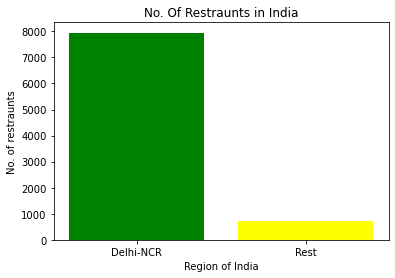

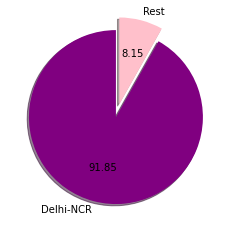

In [24]:
colors=['green','yellow']
plt.bar(x_axis,y_axis,color=colors)
plt.ylabel("No. of restraunts")
plt.xlabel("Region of India")
plt.title("No. Of Restraunts in India")
plt.show()
colors=["purple","pink"]
plt.pie(y_axis,labels =x_axis,explode=[0,0.15],colors=colors,startangle=90,shadow=True,autopct = "%.2f")
plt.show()


### 1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.
Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [25]:
delhi=[]
other=[]

In [26]:
for i in range(len(df.City)):
    if df['City'][i]=='Delhi-NCR':
        if ',' in df['Cuisines'][i]:
            cu=df['Cuisines'][i].split(',')
            for j in cu:
                delhi.append(j.strip())
        else:
            delhi.append(df['Cuisines'][i])
    else:
        if ',' in df['Cuisines'][i]:
            cu=df['Cuisines'][i].split(',')
            for j in cu:
                other.append(j.strip())
        else:
            other.append(df['Cuisines'][i])
            

In [27]:
delhi_s=set(delhi) #set uniques value of cuisines of dehi-ncr
other_s=set(other) #set uniques cuisines of other restro
common=other_s-delhi_s #get unique other restro whic are not in delhi-ncr but in rest of india 
common

{'BBQ', 'Cajun', 'German', 'Malwani'}

In [28]:
# now checking with zomato api which restro data is present or not 
import requests
import json

In [29]:
head = {"user-key":"cf1194b048c4e62fcccfc0f02638d919"}
city=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad']
cities=set()
for i in city:
    p={'query':i}
    h=requests.get("https://developers.zomato.com/api/v2.1/locations",headers=head,params=p)
    data=h.json()
    d1=data['location_suggestions']
d1

[{'entity_type': 'zone',
  'entity_id': 501,
  'title': 'Faridabad',
  'latitude': 28.3956,
  'longitude': 77.319399,
  'city_id': 1,
  'city_name': 'Delhi NCR',
  'country_id': 1,
  'country_name': 'India'}]

In [30]:
# from the above data set and from the api we are getting only the city id of Faridabad 

In [31]:
for i in d1:
    cities.add(i['city_id'])

In [32]:
cities

{1}

#####  so here we can conclude that city_id of Delhi-NCR region is 1

In [33]:
p={'city_id':1}
head={"user-key":"cf1194b048c4e62fcccfc0f02638d919"}
h=requests.get("https://developers.zomato.com/api/v2.1/cuisines",params=p,headers=head)
data=h.json()
d1=data['cuisines']
cuisine=set()
for i in d1:
    cuisine.add(i['cuisine']['cuisine_name'])
for i in cuisine:
    if i in common:
        print(i)

BBQ
Malwani


we didnt get other two restraunt which are in differece of other -delhi ncr because they are not present in dataset

##### Cuisines present actually in Delhi-ncr region but not present in dataset are : BBQ and Malwani

### 1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India. 

In [34]:
# In question 1.2 I had already store the number of cuisines in delhi-ncr and other parts of india 
# now we had to just count the number of count of cuisines

In [35]:
delhi_count={}
for i in delhi:
    if i in delhi_count:
        delhi_count[i]+=1
    else:
        delhi_count[i]=1
rest_count={}
for i in other:
    rest_count[i]=rest_count.get(i,0)+1

In [36]:
sort_d=sorted(delhi_count.items(),key=lambda k:k[1],reverse=True)[:10]
sort_o=sorted(rest_count.items(),key=lambda k:k[1],reverse=True)[:10]
# here we sort the dict based on the values and reverse is true

In [37]:
for i,j in sort_d:
    print(i," : ",j)
print('====================')
for i,j in sort_o:
    print(i," : ",j)

North Indian  :  3597
Chinese  :  2448
Fast Food  :  1866
Mughlai  :  933
Bakery  :  697
South Indian  :  569
Continental  :  547
Desserts  :  542
Street Food  :  538
Italian  :  535
North Indian  :  349
Chinese  :  242
Continental  :  177
Italian  :  147
Cafe  :  136
Fast Food  :  97
South Indian  :  62
Mughlai  :  59
Desserts  :  55
Mexican  :  50


#### 1.4   Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

In [38]:
key_d=[]
value_d=[]
for i,j in sort_d:
    key_d.append(i)
    value_d.append(j)
key_o=[]
value_o=[]
for i,j in sort_o:
    key_o.append(i)
    value_o.append(j)

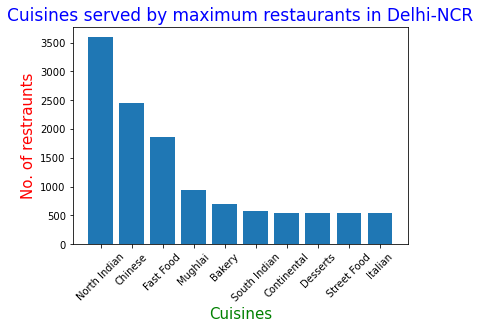

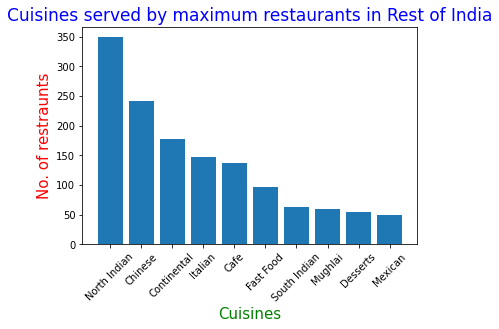

In [39]:
plt.bar(key_d,value_d)
plt.xticks(rotation=45)
plt.xlabel("Cuisines",size=15,color='g')
plt.ylabel("No. of restraunts",size=15,color='r')
plt.title("Cuisines served by maximum restaurants in Delhi-NCR",size=17,color='blue')
plt.show()
print(' ')
plt.bar(key_o,value_o)
plt.xticks(rotation=45)
plt.xlabel("Cuisines",size=15,color='g')
plt.ylabel("No. of restraunts",size=15,color='r')
plt.title("Cuisines served by maximum restaurants in Rest of India",size=17,color='blue')
plt.show()



### 2.  User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

####  2.1  Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

##### 2.1.1 Number of Votes given Restaurant

In [40]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Cuisines', 'Average Cost for two',
       'Price range', 'Aggregate rating', 'Rating text', 'Votes'],
      dtype='object')

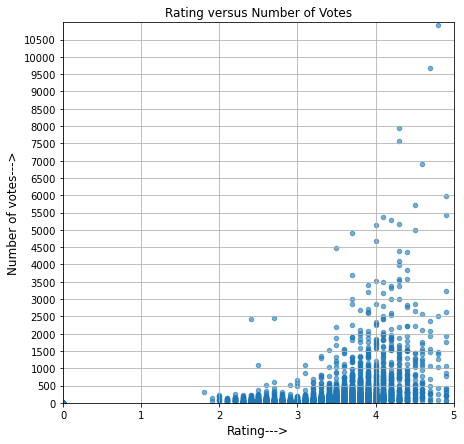

In [41]:
plt.figure(figsize=(7,7))
plt.scatter(df['Aggregate rating'],df['Votes'],s=20,alpha=0.6)
plt.yticks(np.arange(0, 11000, 500))
plt.axis([0, 5, 0, 11000])
plt.xlabel('Rating--->', size=12)
plt.ylabel('Number of votes--->', size=12)
plt.title('Rating versus Number of Votes')
plt.grid()
plt.show()

Clearly as the number of votes increases the chances of getting higher ratings also increases. It is clear from the graph that any restaurants with more than 5000 votes get ratings between 4 and 5. when the votes are less than 2000, there is a diversity of ratings, which varies from 2 to 5. so for a restaurant to have a probability of getting higher aggregate rating, it should have more than 5000 votes. Also there are many restaurants having votes between between 1000 and 2000 with very good ratings, that is between 4 and 5.

In [42]:
df['Aggregate rating']=df['Aggregate rating'].round(0).astype(int)
df['Aggregate rating'].unique()

array([4, 3, 5, 0, 2])

In [43]:
rating={}
for i in df['Aggregate rating']:
    if i in rating:
        rating[i]+=1
    else:
        rating[i]=1
rating

{4: 2576, 3: 3569, 5: 79, 0: 2139, 2: 289}

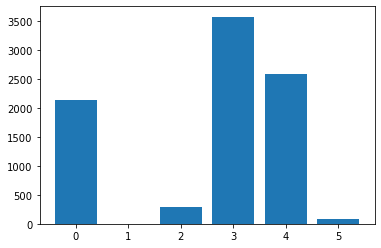

In [44]:
x=[]
y=[]
for i in rating:
    x.append(i)
    y.append(rating[i])
plt.bar(x,y)
plt.show()

 from the above data we can observe that maximum people can given 3 rating and none people has given 1 rating out of 5 

#### 2.1.2  Restaurant serving more number of cuisines

In [45]:
#user rating vs serving more number of cusines

Number of Cuisines served : 2 and Total number of Restaurant serving this Cuisines is : 3144
Number of Cuisines served : 1 and Total number of Restaurant serving this Cuisines is : 3097
Number of Cuisines served : 3 and Total number of Restaurant serving this Cuisines is : 1596
Number of Cuisines served : 4 and Total number of Restaurant serving this Cuisines is : 552
Number of Cuisines served : 5 and Total number of Restaurant serving this Cuisines is : 155
Number of Cuisines served : 6 and Total number of Restaurant serving this Cuisines is : 70
Number of Cuisines served : 7 and Total number of Restaurant serving this Cuisines is : 26
Number of Cuisines served : 8 and Total number of Restaurant serving this Cuisines is : 12


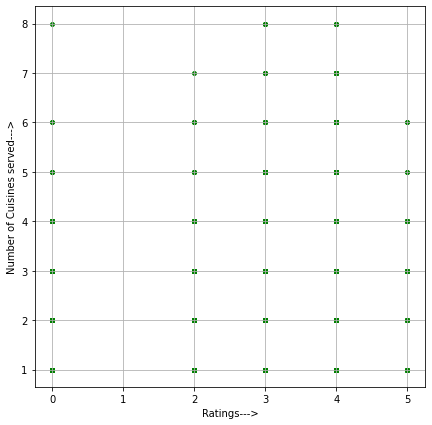

In [90]:
df=df.loc[df['Cuisines'].notnull()]
cuisines=[len(i.split(',')) for i in df.Cuisines]
rating=[i for i in df['Aggregate rating']]
plt.figure(figsize=(7,7))
plt.scatter(rating,cuisines,s=15,c='green',alpha=1)
plt.xlabel('Ratings--->')
plt.ylabel('Number of Cuisines served--->')
plt.grid()
dic=dict()
for i in cuisines:
    if i in dic:
        dic[i]+=1
    else:
        dic[i]=1
for i in dic:
    print('Number of Cuisines served :',i,'and Total number of Restaurant serving this Cuisines is :',dic[i])
plt.show()

From the graph itself, it is clear that when the number of cuisines provided increases from 3 to 8, generally the rating seems to converge between 3 and 4. restaurants providing more number of cuisines are not much likely to get higher ratings, specially when the number of cuisines provided exceeds 6. while if the restaurants provide less number of cuisines, for example 1 or 2 cuisines, they are more likely to get higher ratings. Infact many restaurants in india are providing 2 cuisines. there is a very less number of restaurants providing 8 cuisines. it seems like when a restaurant provides too many cuisines, its focus on the quality of food offered diverges. while restaurants providing less cuisines focus on the quality of food to get good aggregate ratings.

#### 2.1.3 Average Cost of Restaurant

In [93]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Cuisines', 'Average Cost for two',
       'Price range', 'Aggregate rating', 'Rating text', 'Votes'],
      dtype='object')

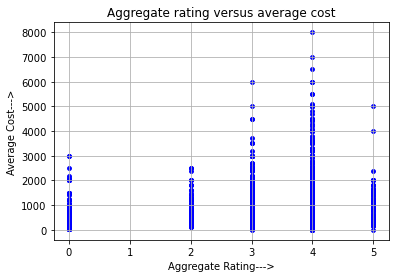

In [122]:
#plt.figure(figsize=(8,5))
plt.scatter(df['Aggregate rating'],df['Average Cost for two'],c='blue',s=15)
plt.grid()
plt.xlabel('Aggregate Rating--->')
plt.ylabel('Average Cost--->')
plt.title('Aggregate rating versus average cost')
plt.show()

As from the above graph we can analize that average rating varies from 3 to 4 from averge cost also varies from 2000 to 5000 . As we go further we see that most number of 5 rating is given to range between 0 to 2000 from here we analize that rating of 5 is givn to most of the low range of restaurents.But for the higher price ranges the rating is between 3 and 4.

#### 2.1.4 Restaurant serving some specific cuisines